# WeatherPy

#Observed Trends

1.   An observable trend between relationship between maximum temperatures and latitudes is that the temperature tends to linearly increase towards the latitude 20 across the northern and southern hemisphere, peaking at latitude 20 in the northern hemisphere and latitude -20  in the southern hemisphere, rather than reaching a peak at the equator.   Also, there is a strong relationship between temperatures and latitudes, and based on linear regression r-squared values for the best fit are about -0.75 and 0.82 for the northern and southern hemispheres respectively.  
2.  Upon analysis of geolocation versus humidity heatmap, an observable trend is that coastal areas across the world are more humid (as shown by red dots) than inland areas.  The explanation for this trend is that air absorbs moisture directly from the sea and humidity levels increase as the air get hotter.  An interesting trend is that most of the cities that were a fit to my weather prescripts are concentrated in the Middle East where there is no significant amount of heat marks.  
3. From the plots cloudiness seem to have no correlation with geolocation.  Clouds are haphazardly spread all over the latitudes across both atmospheres with insignificant negative r-squared values: -0.09 and -0.12 for northern and southern hemisphere respectively.   


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import json
import urllib
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [3]:
#OpenWeatherMap API Key
api_key = weather_api_key

#starting URL for Weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Define empty lists to store values

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Print to logger
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count = 1
set_count = 1

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    
#Extracting data. Missing data is handled by try and except  
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"]) 
        print(f"Processing record {i}|{city}")
        i+=1
         
    except (KeyError):
        print("City not found. skipping.")
    
print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')         
     

Beginning Data Retrieval
------------------------
City not found. skipping.
Processing record 1|puerto ayora
Processing record 2|busselton
Processing record 3|severo-kurilsk
Processing record 4|nikolskoye
Processing record 5|atar
Processing record 6|codrington
City not found. skipping.
Processing record 7|port elizabeth
Processing record 8|ermoupolis
Processing record 9|rikitea
City not found. skipping.
Processing record 10|hobart
City not found. skipping.
Processing record 11|floro
Processing record 12|hamilton
Processing record 13|new norfolk
Processing record 14|bilma
Processing record 15|tapes
Processing record 16|santa vitoria do palmar
Processing record 17|chuy
Processing record 18|ushuaia
Processing record 19|tokur
Processing record 20|kyra
Processing record 21|asau
Processing record 22|lisakovsk
Processing record 23|vaini
Processing record 24|bluff
Processing record 25|georgetown
Processing record 26|tuatapere
City not found. skipping.
Processing record 27|saskylakh
Processing 

Processing record 247|maridi
Processing record 248|evensk
Processing record 249|chute-aux-outardes
Processing record 250|vila
Processing record 251|victor harbor
Processing record 252|mounana
Processing record 253|port macquarie
Processing record 254|pemangkat
Processing record 255|kanniyakumari
Processing record 256|uyemskiy
Processing record 257|buala
Processing record 258|kaniama
Processing record 259|terre haute
Processing record 260|huarmey
Processing record 261|pevek
Processing record 262|inhambane
Processing record 263|lavrentiya
Processing record 264|keti bandar
Processing record 265|bethel
Processing record 266|deputatskiy
City not found. skipping.
Processing record 267|laguna
Processing record 268|taunggyi
City not found. skipping.
Processing record 269|nome
Processing record 270|iquique
Processing record 271|san juan
Processing record 272|forestville
Processing record 273|eggenfelden
Processing record 274|urla
Processing record 275|dudinka
Processing record 276|takaka
Proces

Processing record 496|san policarpo
Processing record 497|manicore
Processing record 498|twin falls
Processing record 499|cruzeiro do sul
Processing record 500|yinchuan
Processing record 501|tiffin
Processing record 502|mikkeli
City not found. skipping.
Processing record 503|mackay
Processing record 504|san patricio
Processing record 505|linhares
Processing record 506|markala
Processing record 507|sol-iletsk
Processing record 508|kabinda
Processing record 509|leiyang
Processing record 510|dinghai
Processing record 511|tanabe
Processing record 512|benalla
Processing record 513|udachnyy
Processing record 514|amuntai
Processing record 515|moree
Processing record 516|samarai
Processing record 517|dolores
Processing record 518|algiers
Processing record 519|hirara
Processing record 520|general roca
Processing record 521|birjand
Processing record 522|soe
Processing record 523|acobamba
Processing record 524|petropavlovsk-kamchatskiy
Processing record 525|kristiansund
Processing record 526|kaeo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#Turn appended lists into dictionary
weather_dict = {
                "City": cities,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Cloudiness": cloudiness,
                "Humidity": humidity, 
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date                       
               }
#Turn dictionary into dataframe
city_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})


# export city_data into csv
export_csv = city_data.to_csv (output_data_file, index_label = "City_ID")

# display Dataframe head
city_data.head()

,City,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Country,Date
0,belushya guba,-0.7393,-90.3518,72.55,31.0,91.0,4.00,EC,1.623310e+09
1,puerto ayora,-33.6500,115.3333,62.10,71.0,80.0,16.46,AU,1.623310e+09
2,busselton,50.6789,156.1250,47.84,95.0,85.0,6.78,RU,1.623310e+09
3,severo-kurilsk,59.7035,30.7861,73.80,81.0,40.0,3.74,RU,1.623310e+09
4,nikolskoye,20.5169,-13.0499,86.20,0.0,36.0,4.81,MR,1.623310e+09


In [24]:
# drop all the rows in which any of the column contains null value.
city_data = city_data.dropna(how="any")
city_data.count()

City          545
Lat           545
Lng           545
Max Temp      545
Cloudiness    545
Humidity      545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [25]:
#Exporting data to csv
city_data.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
print("No city with humidity over 100%")

No city with humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

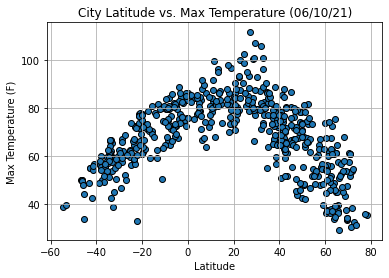

In [27]:
#set todat date
today_date = pd.to_datetime('today').date().strftime('%m/%d/%y')

#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Max Temp']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({today_date})")

#save & show
plt.savefig('output_data/LatitudeVsMaxTemp.png')

The above scatterplot is analyzing temperature values closer and further away from the equator.  Temperatures seem to peak around 20 latitudes and drop as we move away from the 20 latitude.


## Latitude vs. Humidity Plot

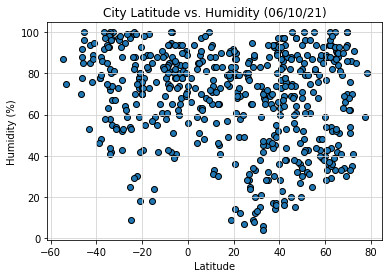

In [28]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Humidity']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/LatitudeVsHumidity.png')

At first glance it seems there is not relationship between humidity and latitude, but humidity percentages appear to be largely clustered above 50% across the x_axis. 

## Latitude vs. Cloudiness Plot

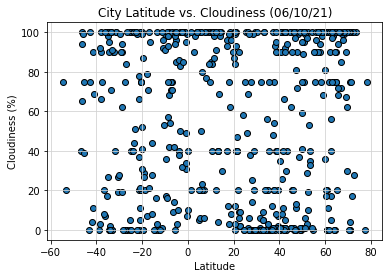

In [29]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Cloudiness']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/LatitudeVsCloudiness.png')

 Clouds are widely spread across the latitudes. The scatterplot above does not appear to show a definitive relationship between cloud cover and geolocation.

## Latitude vs. Wind Speed Plot

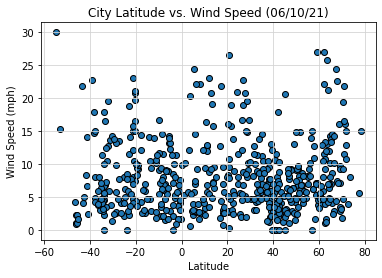

In [30]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Wind Speed']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/LatitudeVsWindSpeed.png')

Wind speed data is clustered  below 20mph across the latitude. The plot does not show any relationship between latitude and wind speed.

## Linear Regression

In [31]:
 def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data.loc[city_data['Lat'] >= 0, :]
southern_hemisphere_df = city_data.loc[city_data['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7415403409437049


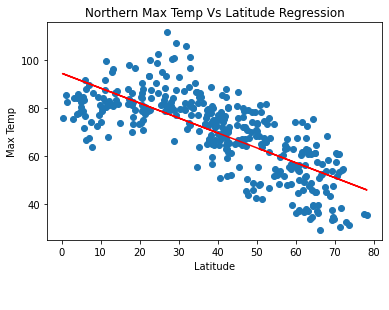

In [33]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0)) 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8066577941426654


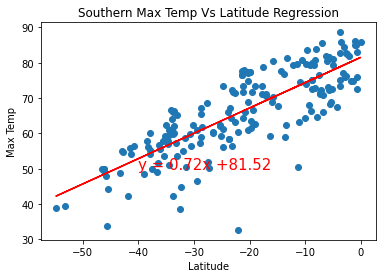

In [34]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

Both hemispheres show strong correlations (negative for the northern hemisphere and positive hemisphere) between maximum temperatures and latitudes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.002020242936399283


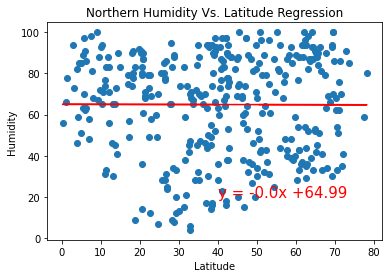

In [35]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20)) 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06926141961980478


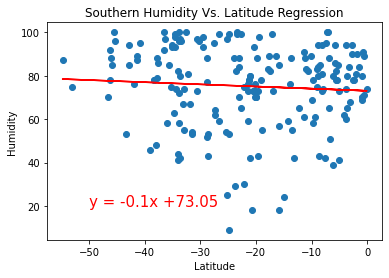

In [36]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20)) 

Neither hemispheres display strong correlations between humidity levels and latitudes. geolocation. Scores indicate the variability cannot be predicted by the line of best fit.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09161330007129026


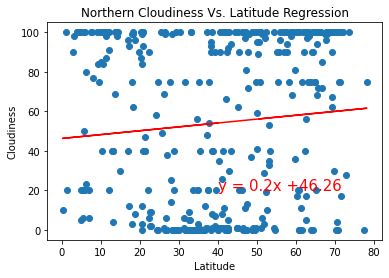

In [37]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20)) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07881227783367903


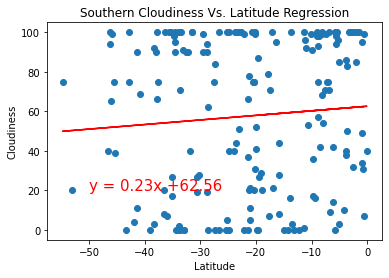

In [38]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20)) 

Neither hemisphere display a strong correlations between cloudiness and latitudes. Scores indicate that the variability cannot be predicted by the line of best fit.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019175640055200813


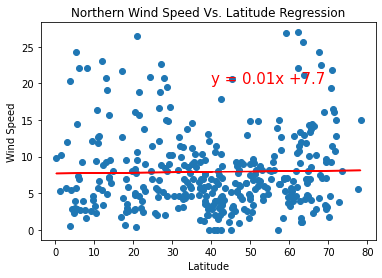

In [39]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20)) 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0959116659202939


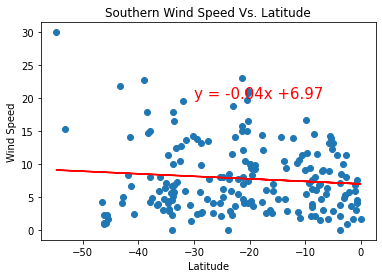

In [40]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Latitude', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20)) 

Neither hemisphere display strong correlations between wind speeds and latitudes. Scores indicate that the variability cannot be predicted by the line of best fit.
